<a href="https://colab.research.google.com/github/doggest25/machine_learning/blob/main/week%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

**Deskripsi**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

**Langkah 1 - Import Library**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Langkah 2 - Load Data dan Visualisasi**

In [1]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


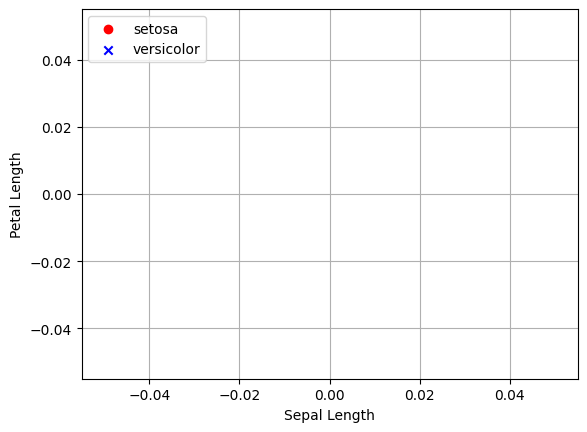

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ML/Iris2.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

# Menggunakan Sepal Length (0) dan Petal Length (2)
a, b = 0, 2
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()


**Langkah 3 - Membuat Kelas Perceptron**

In [36]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 4 - Pilih Data dan Encoding Label**

In [37]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

**Langkah 5 - Fitting Model**

In [38]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # Convert xi to a NumPy array with float dtype before prediction
                xi = np.array(xi, dtype=np.float64)
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

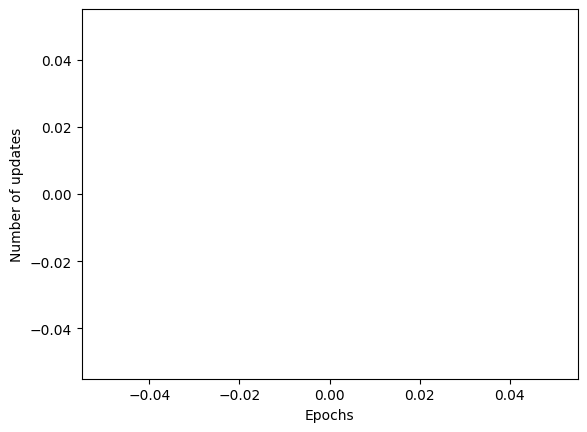

In [39]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


Langkah 7 - Visualiasasi Decision Boundary

In [40]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# Praktikum 2

**Deskripsi**

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

**Langkah 1 - Import Library**

In [9]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

**Langkah 2 - Pilih Label dan Split Data**

In [10]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

**Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [11]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



**Penjelasan**

Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.



# Praktikum 3

**Deskripsi**

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

**Langkah 1 - Import Library**

In [12]:
from sklearn.neural_network import MLPClassifier

**Langah 2 - Buat Data**

In [13]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

**Langkah 3 - Fit Model**

In [14]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

**Langkah 4 - Prediksi**

In [15]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Praktikum 4

**Deskripsi**

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

**Pra Pengolahan Data**



**Langkah 1 - Import Library**

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Langkah 2 - Load Data**

In [17]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [18]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Langkah 3 - Encoding Data Kategorikal**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

**Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Langkah 5 - Split Data**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Langkah 6 - Scaling Fitur**

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Membuat Model ANN**

**Langkah 1 - Inisiasi Model ANN**

In [23]:
ann = tf.keras.models.Sequential()

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [24]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 3 - Membuat Hidden Layer Kedua**

In [25]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 4 - Membuat Output Layer**

In [26]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training Model

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [27]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 2 - Fitting Model**

In [28]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5940 - loss: 0.6565
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4976
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4449
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8208 - loss: 0.4207
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.4138
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8349 - loss: 0.3942
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8312 - loss: 0.3969
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8343 - loss: 0.3902
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8372 - loss: 0.3855
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8498 - loss: 0.3739
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8514 - loss: 0.3678
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

**Membuat Prediksi**

Diberikan informasi sebagai berikut,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

**Modelkan Data Baru dan Buat Prediksi**

In [29]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[False]]


Apakah hasilnya False?

**Prediksi Dengan Data Testing**

In [30]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Cek Akurasi dan Confusion Matrix**

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1511   84]
 [ 196  209]]


0.86

# Tugas

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

- Anda diperbolehkan melakukan eksplorasi terhadap,

  - Metode pra pengolahan

  - Pemilihan fitur

  - Arsitektur ANN

  - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.

**DIKERJAKAN SECARA BERKELOMPOK**

**JELASKAN HASIL YANG ANDA DAPATKAN,**

**- AKURASI**

**- CONFUSION MATRIX**

**- KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN **

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Pra Pengolahan Data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
# Arsitektur ANN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan Model
model.fit(train_images, train_labels, epochs=5)

# Evaluasi Model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8634 - loss: 0.4685
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9551 - loss: 0.1527
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.9674 - loss: 0.1082
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9736 - loss: 0.0896
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9758 - loss: 0.0763
313/313 - 1s - 2ms/step - accuracy: 0.9774 - loss: 0.0739

Test accuracy: 0.977400004863739


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


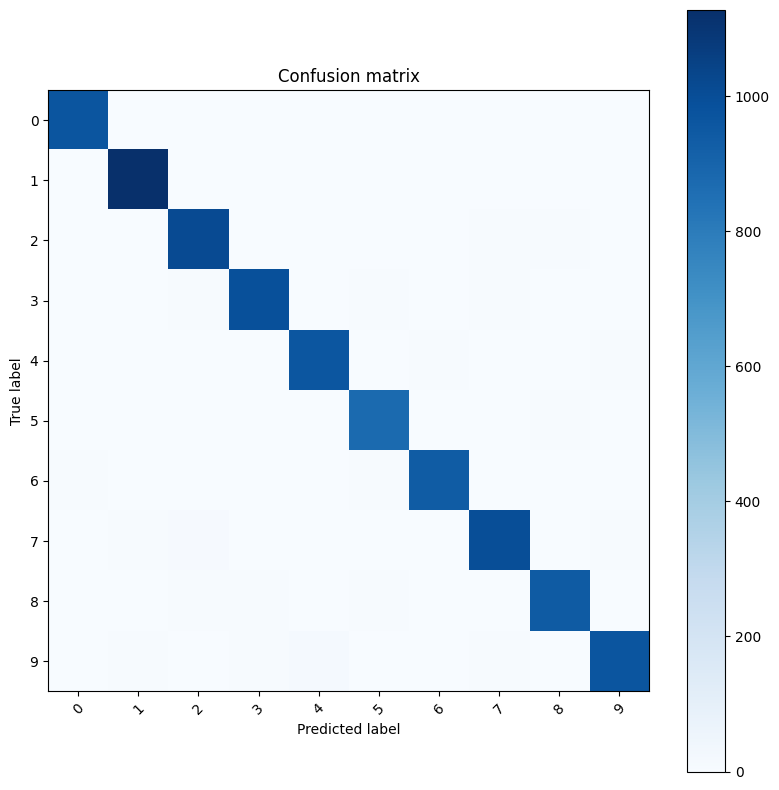

In [34]:
# Prediksi
predictions = model.predict(test_images)

# Confusion Matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

test_predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, test_predictions)
plot_confusion_matrix(cm, class_names=range(10))

**Penjelasan Tugas**

Akurasi: Ini adalah matrik yang mengukur sejauh mana model dapat mengklasifikasikan data uji dengan benar. Akurasi adalah jumlah kelas yang diprediksi dengan benar dibagi dengan jumlah total sampel. Akurasi digunakan untuk mengukur seberapa baik model ANN dalam mengenali digit tulisan tangan pada dataset MNIST. Dapat melihat akurasi dalam output pelatihan model saat kode dijalankan. Biasanya, akurasi akan meningkat selama pelatihan model. Contoh output pelatihan:

```
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2997 - accuracy: 0.9157
...
...
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9859
313/313 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9756

Test accuracy: 0.9756
```
Dalam contoh ini, akurasi pada data uji adalah sekitar 97.56%.

**Confusion Matrix**: Matriks kebingungan (confusion matrix) adalah alat yang digunakan untuk mengukur kinerja model klasifikasi. Ini adalah tabel yang membandingkan kelas yang diprediksi dengan kelas sebenarnya dari data uji. Ini membantu mengidentifikasi sejauh mana model membingungkan antara kelas tertentu. Dalam kode yang saya berikan, matriks kebingungan akan ditampilkan dalam bentuk gambar plot yang memvisualisasikan seberapa baik model ANN mengklasifikasikan masing-masing digit (0 hingga 9). Matriks ini memberikan informasi tentang sejauh mana model memprediksi dengan benar setiap digit.

**Konfigurasi Model**: Konfigurasi model dijelaskan sebagai berikut:

1. Pra-Pemrosesan Data: Dataset MNIST diimpor menggunakan TensorFlow dan kemudian dibagi menjadi data latih dan data uji. Selanjutnya, citra-citra dalam dataset tersebut dinormalisasi sehingga intensitas piksel berada dalam rentang 0 hingga 1.
2. Pemilihan Fitur: Pemilihan fitur sebenarnya tidak terlihat dalam kode yang ada. Dataset MNIST adalah dataset citra digit tulisan tangan yang umumnya digunakan untuk tugas pengenalan digit. Biasanya, di sini tidak perlu memilih fitur secara manual karena fiturnya adalah intensitas piksel dalam citra. Semua piksel dianggap sebagai fitur. Kode yang ada lebih fokus pada arsitektur jaringan saraf tiruan (ANN) dan pelatihan model daripada pemilihan fitur.
3. Arsitektur ANN: Model ANN terdiri dari tiga lapisan, yaitu lapisan input, lapisan tersembunyi, dan lapisan output. Lapisan input adalah citra MNIST yang telah diubah menjadi vektor. Lapisan tersembunyi memiliki 128 unit dengan fungsi aktivasi ReLU. Lapisan dropout digunakan untuk mencegah overfitting. Lapisan output memiliki 10 unit (satu untuk setiap digit) dengan fungsi aktivasi softmax. Model ini dikompilasi dengan optimisasi "adam" dan menggunakan fungsi kerugian "sparse_categorical_crossentropy". Model ini dilatih selama 5 epoch.
4. Fungsi Aktiviasi: Dalam kode yang diberikan, terdapat dua jenis fungsi aktivasi yang digunakan:
  - Fungsi Aktivasi ReLU (Rectified Linear Unit):
```
keras.layers.Dense(128, activation='relu')
```
  Fungsi aktivasi ReLU digunakan dalam lapisan tersembunyi. Ini adalah fungsi aktivasi yang umum digunakan dalam jaringan saraf tiruan. Ini sederhana dan memetakan input positif ke dirinya sendiri dan mengubah input negatif menjadi nol. Fungsi ini membantu jaringan untuk belajar representasi yang lebih baik dari data.

  - Fungsi Aktivasi Softmax:
```
keras.layers.Dense(10, activation='softmax')
```
  Fungsi aktivasi softmax digunakan dalam lapisan output. Fungsi ini cocok untuk masalah klasifikasi dengan lebih dari dua kelas. Softmax menghitung probabilitas distribusi kelas, sehingga setiap neuron output mewakili probabilitas kelas tertentu. Kelas dengan probabilitas tertinggi dianggap sebagai prediksi model.

  Jadi, dalam konteks ini, fungsi aktivasi ReLU digunakan dalam lapisan tersembunyi untuk memungkinkan jaringan untuk belajar representasi fitur yang kompleks, sementara fungsi aktivasi softmax digunakan dalam lapisan output untuk menghasilkan probabilitas kelas output.

Ini adalah penguraian hasil, akurasi, confusion matrix, dan konfigurasi model untuk kode yang telah diberikan.